# Imports

In [0]:
import pandas as pd 
import numpy as np
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [3]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [4]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [5]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [6]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [7]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [8]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [9]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [10]:
df_postures_comfort = df_postures.filter(regex='Comfort_')
df_postures_preference = df_postures.filter(regex='Preference_')

df_postures_comfort_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_comfort_stats["posture"] = [i.replace("Comfort_","") for i in df_postures_comfort.keys()]
df_postures_comfort_stats["mean"] = df_postures_comfort.mean().values
df_postures_comfort_stats["std"] = df_postures_comfort.std().values

df_postures_preference_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_preference_stats["posture"] = [i.replace("Preference_","") for i in df_postures_preference.keys()]
df_postures_preference_stats["mean"] = df_postures_preference.mean().values
df_postures_preference_stats["std"] = df_postures_preference.std().values

# df_postures_comfort_stats= df_postures_comfort_stats.sort_values(by = "mean", ascending=False)
# df_postures_preference_stats= df_postures_preference_stats.sort_values(by = "mean", ascending=False)
df_postures_comfort_stats['rating']='comfort'
df_postures_preference_stats['rating']='preference'
# df = pd.DataFrame(columns=['mean', 'std'])
print(df_postures_comfort_stats.head())
print(df_postures_preference_stats.head())

               posture      mean       std   rating
0    Below_Left_Fist_0  3.700000  1.087547  comfort
1   Below_Right_Fist_0  3.933333  1.048261  comfort
2   Below_Left_Fist_90  3.866667  1.252125  comfort
3  Below_Right_Fist_90  4.300000  0.952311  comfort
4  Below_Left_Fist_180  2.133333  0.973204  comfort
               posture      mean       std      rating
0    Below_Left_Fist_0  3.466667  0.899553  preference
1   Below_Right_Fist_0  3.733333  0.980265  preference
2   Below_Left_Fist_90  3.666667  1.321789  preference
3  Below_Right_Fist_90  4.200000  1.095445  preference
4  Below_Left_Fist_180  2.300000  1.235956  preference


In [11]:
all_postures_stats=pd.merge(df_postures_comfort_stats, df_postures_preference_stats, how="outer", on=['posture','rating','mean','std'])
all_postures_stats_melted = pd.melt(all_postures_stats, id_vars =['posture','mean','std'], value_vars =['rating']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
all_postures_stats_melted.head()

posture      mean       std variable    value
value                                                                
comfort 19      On_Right_Palm_0  4.366667  0.999425   rating  comfort
        7    Below_Right_Palm_0  4.333333  0.660895   rating  comfort
        3   Below_Right_Fist_90  4.300000  0.952311   rating  comfort
        6     Below_Left_Palm_0  4.133333  0.860366   rating  comfort
        18       On_Left_Palm_0  4.066667  0.980265   rating  comfort

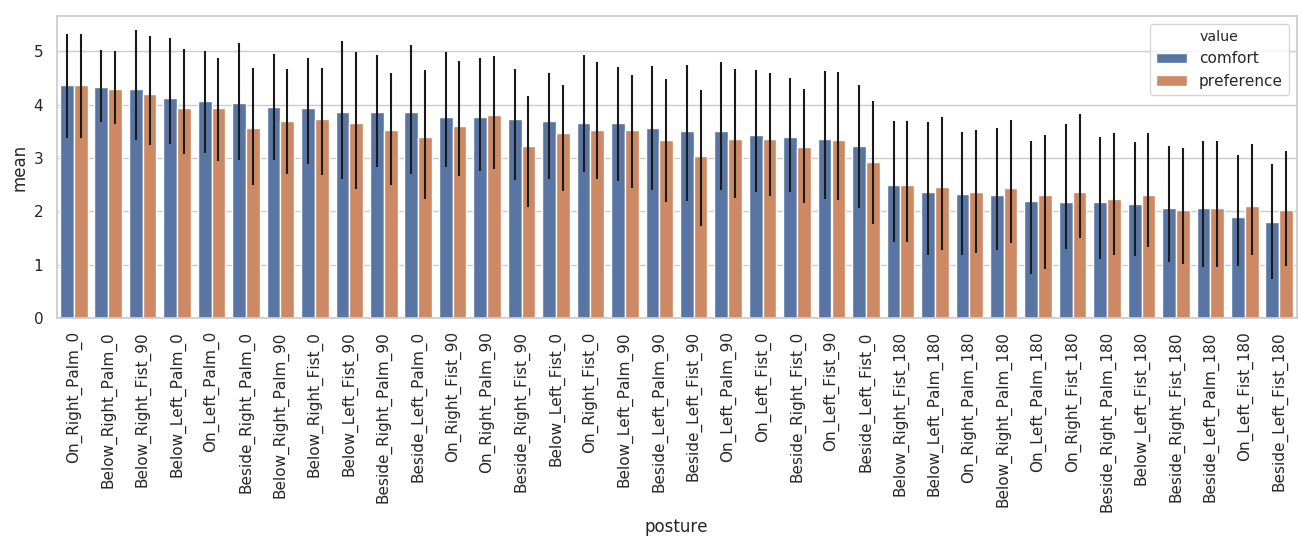

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="posture", y="mean", hue="value", data=all_postures_stats_melted, yerr=[all_postures_stats_melted["std"][:36],all_postures_stats_melted["std"][36:]],capsize=10)

In [186]:
postures_orientation_0 = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('_0')]
postures_orientation_90 = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('_90')]
postures_orientation_180 = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('_180')]
# postures_orientation_stats 
df = postures_orientation_0.groupby(level='value').mean().reset_index()
df["orientation"] = 0
postures_orientation_stats = pd.concat([df])
df = postures_orientation_90.groupby(level='value').mean().reset_index()
df["orientation"] = 90
postures_orientation_stats = pd.concat([postures_orientation_stats, df])
df = postures_orientation_180.groupby(level='value').mean().reset_index()
df["orientation"] = 180
postures_orientation_stats = pd.concat([postures_orientation_stats, df])

postures_orientation_stats = pd.melt(postures_orientation_stats, id_vars =['orientation', 'mean','std'], value_vars=['value']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
# postures_orientation_stats.head()

orientation      mean       std variable       value
value                                                             
comfort    0            0  3.847222  1.005567    value     comfort
           2           90  3.738889  1.094179    value     comfort
           4          180  2.166667  1.069071    value     comfort
preference 1            0  3.644444  1.028165    value  preference
           3           90  3.527778  1.173942    value  preference

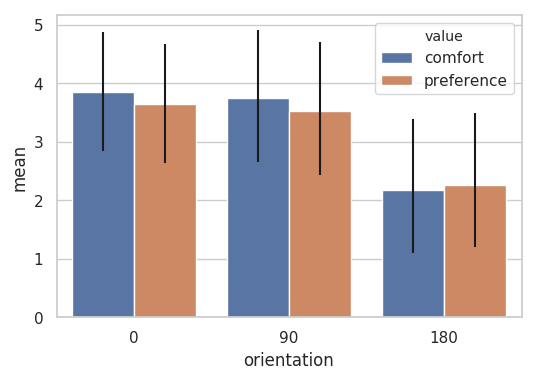

In [205]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
# plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="orientation", y="mean", hue="value", data=postures_orientation_stats, yerr=[postures_orientation_stats["std"][:3],postures_orientation_stats["std"][3:]])

In [193]:
postures_surface_on = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('On_')]
postures_surface_below = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('Below_')]
postures_surface_beside = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('Beside_')]
# postures_orientation_stats 
df = postures_surface_on.groupby(level='value').mean().reset_index()
df["surface"] = "on"
postures_surface_stats = pd.concat([df])
df = postures_surface_below.groupby(level='value').mean().reset_index()
df["surface"] ="below"
postures_surface_stats = pd.concat([postures_surface_stats, df])
df = postures_surface_beside.groupby(level='value').mean().reset_index()
df["surface"] = "beside"
postures_surface_stats = pd.concat([postures_surface_stats, df])

postures_surface_stats = pd.melt(postures_surface_stats, id_vars =['surface', 'mean','std'], value_vars=['value']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
postures_surface_stats.head()

surface      mean       std variable       value
value                                                        
comfort    2   below  3.433333  1.017749    value     comfort
           0      on  3.211111  1.039844    value     comfort
           4  beside  3.108333  1.111224    value     comfort
preference 3   below  3.352778  1.075438    value  preference
           1      on  3.202778  1.138841    value  preference

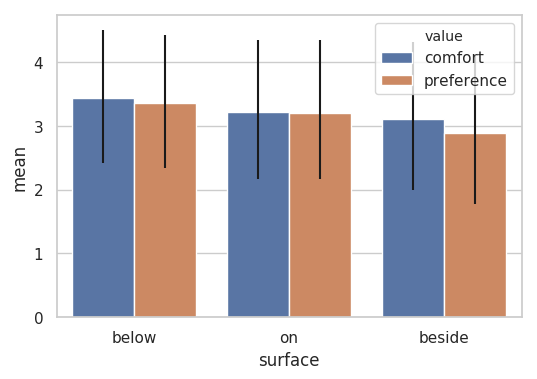

In [204]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
# plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="surface", y="mean", hue="value", data=postures_surface_stats, yerr=[postures_surface_stats["std"][:3],postures_surface_stats["std"][3:]])

In [199]:
postures_left_hand = all_postures_stats_melted.loc[all_postures_stats_melted.posture.str.contains('_Left_')]
postures_right_hand = all_postures_stats_melted.loc[all_postures_stats_melted.posture.str.contains('_Right_')]
# postures_orientation_stats 
df = postures_left_hand.groupby(level='value').mean().reset_index()
df["dexterity"] = "left"
postures_dexterity_stats = pd.concat([df])
df = postures_right_hand.groupby(level='value').mean().reset_index()
df["dexterity"] ="right"
postures_dexterity_stats = pd.concat([postures_dexterity_stats, df])

postures_dexterity_stats = pd.melt(postures_dexterity_stats, id_vars =['dexterity', 'mean','std'], value_vars=['value']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
postures_dexterity_stats.head()

dexterity      mean       std variable       value
value                                                          
comfort    2     right  3.370370  1.000327    value     comfort
           0      left  3.131481  1.112217    value     comfort
preference 3     right  3.261111  1.091534    value  preference
           1      left  3.031481  1.187975    value  preference

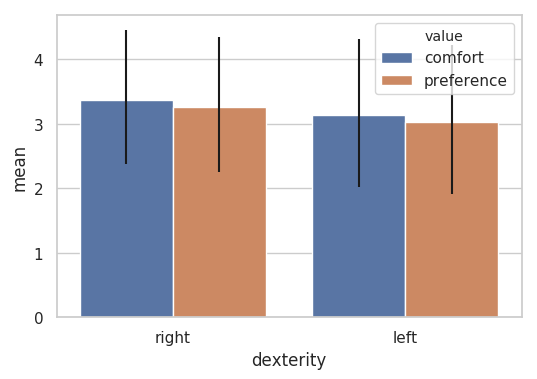

In [206]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
# plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="dexterity", y="mean", hue="value", data=postures_dexterity_stats, yerr=[postures_dexterity_stats["std"][:2],postures_dexterity_stats["std"][2:]])

In [208]:
postures_open_form = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('_Palm_')]
postures_close_form = all_postures_stats_melted[all_postures_stats_melted.posture.str.contains('_Fist_')]
# postures_orientation_stats 
df = postures_open_form.groupby(level='value').mean().reset_index()
df["hand form"] = "open"
postures_handform_stats = pd.concat([df])
df = postures_close_form.groupby(level='value').mean().reset_index()
df["hand form"] ="close"
postures_handform_stats = pd.concat([postures_handform_stats, df])

postures_handform_stats = pd.melt(postures_handform_stats, id_vars =['hand form', 'mean','std'], value_vars=['value']).groupby("value").apply(lambda x: (x.sort_values('mean', ascending=False)))
postures_handform_stats.head()

hand form      mean       std variable       value
value                                                          
comfort    0      open  3.364815  1.058407    value     comfort
           2     close  3.137037  1.054137    value     comfort
preference 1      open  3.257407  1.152518    value  preference
           3     close  3.035185  1.126991    value  preference

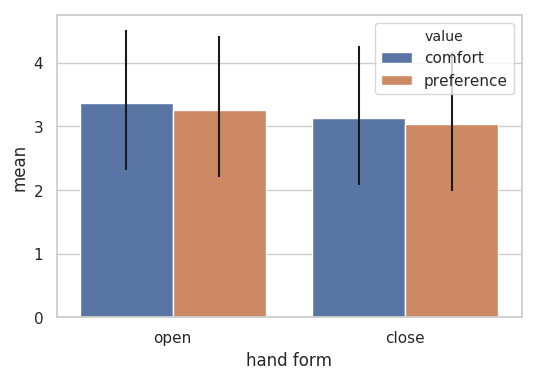

In [209]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
# plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="hand form", y="mean", hue="value", data=postures_handform_stats, yerr=[postures_handform_stats["std"][:2],postures_handform_stats["std"][2:]])

**To do**

- Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)
- Give design recomendations based on above^^